# Project : France Traffic DataSet

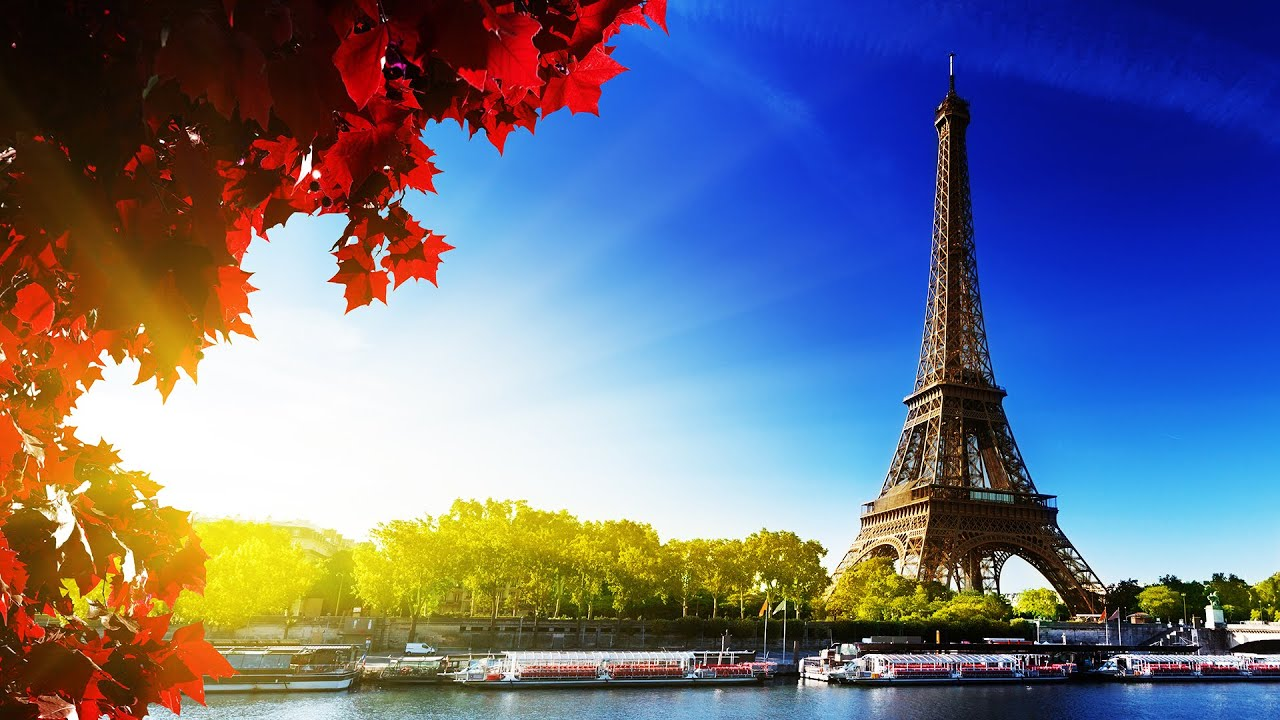

## Table of Contents

1. Introduction <br>
   1.1 Importing Libraries<br><br>
   
2. Data Wrangling <br>
   2.1 Reading Dataset<br>
   2.2 Exploring Data<br>
   2.3 Check Missing Data<br>
   2.4 Cleaning Data<br><br>

3. Statstics<br>
4. Feature Extraction<br>
   4.1 Extract new columns<br>
   4.2 Exploratory Data Analysis<br><br>

5. Work With Categorical Data<br>
   
   
   

## Introduction

#### DataSet Columns:
- This dataset presents the number of passenger validations per day per station name and per ticket on the rail network.
     * DATE : Date of validation.
     * STATION_NAME : validation's station name.
     * ID_REFA_LDA : Stop identifier in the STIF reference database.
     * TITLE_CATEGORY : Transport tickets( IMAGINE R,NAVIGO, AMETHYSTE, FGT , NOT DEFINED)
     * NB_VALID : The number of passenger validations
     
#### Title_categories Column: 

   * IMAGINE R: combines the annual Imagine R School and Imagine R Student packages reserved for pupils, apprentices           and students which allows to travel at will all year round and in all of Ile-de-France.<br>
   
   * NAVIGO : includes the Navigo Annuel, Navigo Mois and Navigo Semaine packages.<br>
   
   * AMETHYSTE : includes the Amethyst packages: package reserved for seniors or disabled under conditions of means or          status, and residing in the Île-de-France region.<br>
   
   * TST : groups together weekly and monthly reduced fare packages granted to beneficiaries of the Transportation              Solidarity Reduction program, to travel within the selected zones in all the modes of transport in the Île-de-France        region.<br>
   
   * FGT : accounts for the Navigo Gratuité Transport Packages, a package that allows certain receiving social assistance        to travel free of charge throughout the Paris Region.<br>
   
   * OTHER TITLE : accounts for special packages.<br><br>
   
   * NON DEFINED : records validations for which the type of ticket is not defined (anomalies)<br>
     
     NB_VALID : Number of validations. 1 validation = 1 person <br>
     ID REFA LDA : -1 means that the data is not defined
 

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

## Data Wrangling

#### Reading Dataset

In [2]:
df = pd.read_csv('Travel_titles_validations_in_Paris_and_suburbs.csv')
df.head()

,DATE,STATION_NAME,ID_REFA_LDA,TITLE_CATEGORY,NB_VALID
0,21/07/2019,LA TOUR MAUBOURG,71242.0,NAVIGO,1141
1,21/07/2019,PARMENTIER,71801.0,NOT DEFINED,Less than 5
2,21/07/2019,PARMENTIER,71801.0,TST,97
3,21/07/2019,PEREIRE-LEVALLOIS,71453.0,FGT,53
4,21/07/2019,PERNETY,412687.0,OTHER,36


#### Exploring  Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 883958 entries, 0 to 883957
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            883944 non-null  object 
 1   STATION_NAME    883948 non-null  object 
 2   ID_REFA_LDA     882430 non-null  float64
 3   TITLE_CATEGORY  883948 non-null  object 
 4   NB_VALID        883950 non-null  object 
dtypes: float64(1), object(4)
memory usage: 33.7+ MB


In [4]:
df.describe(include = "all")

,DATE,STATION_NAME,ID_REFA_LDA,TITLE_CATEGORY,NB_VALID
count,883944,883948,882430.000000,883948,883950
unique,184,686,NaN,9,17497
top,13/11/2019,GARE DE LYON,NaN,NAVIGO,Less than 5
freq,5704,4765,NaN,118259,128827
mean,NaN,NaN,69150.207609,NaN,NaN
std,NaN,NaN,27607.270811,NaN,NaN
min,NaN,NaN,-1.000000,NaN,NaN
25%,NaN,NaN,66338.000000,NaN,NaN
50%,NaN,NaN,71158.000000,NaN,NaN
75%,NaN,NaN,71756.000000,NaN,NaN


In [5]:
originalShape = df.shape
print(originalShape)

(883958, 5)


In [6]:
ColumnNames=df.columns.to_list()
ColumnNames

['DATE', 'STATION_NAME', 'ID_REFA_LDA', 'TITLE_CATEGORY', 'NB_VALID']

In [7]:
df.dtypes

DATE               object
STATION_NAME       object
ID_REFA_LDA       float64
TITLE_CATEGORY     object
NB_VALID           object
dtype: object

#### Check Missing Data

In [8]:
df.isnull().sum()
df.isna().sum()

DATE                14
STATION_NAME        10
ID_REFA_LDA       1528
TITLE_CATEGORY      10
NB_VALID             8
dtype: int64

<AxesSubplot:>

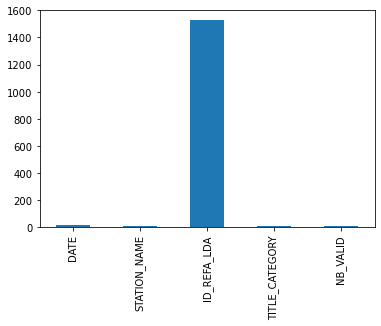

In [9]:
df.isna().sum().plot(kind = 'bar')

<AxesSubplot:>

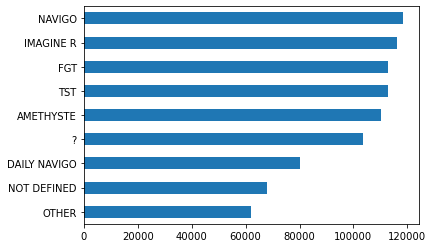

In [10]:
df['TITLE_CATEGORY'].value_counts().sort_values().plot(kind='barh')

In [11]:
df.isnull().any()

DATE              True
STATION_NAME      True
ID_REFA_LDA       True
TITLE_CATEGORY    True
NB_VALID          True
dtype: bool

#### Cleaning Data

In [12]:
#Check Duplicates
df.duplicated().sum()

1241

In [13]:
#Remove duplicate but leave one 
df.drop_duplicates(keep='first',inplace=True)
df.shape

(882717, 5)

In [14]:
#Drop -1 as it is a undefind value for the data so it looks like null value
df.drop(df[df.ID_REFA_LDA == -1].index, inplace=True)

In [15]:
#Remove nulls row first
df.dropna(axis=0,how='any',thresh=None,subset=None,inplace=True)

In [16]:
# Remove ID_REFA_LDA Column
df=df.drop(['ID_REFA_LDA'], axis=1)

In [17]:
# Most frequence of TITLE_CATEGORY Column
df['TITLE_CATEGORY'].mode()

0    NAVIGO
dtype: object

In [18]:
# fit TITLE_CATEGORY cloumn with most frequent
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp = imp.fit(df[['TITLE_CATEGORY']])

In [19]:
df['TITLE_CATEGORY']= imp.transform(df[['TITLE_CATEGORY']])

In [20]:
# replace value "?" with most frequent
imp = SimpleImputer(missing_values='?', strategy='most_frequent')
imp = imp.fit(df[['TITLE_CATEGORY']])

In [21]:
df['TITLE_CATEGORY']= imp.transform(df[['TITLE_CATEGORY']])

In [22]:
# Replace value "less than 5" with Constant value '2' in NB_VALID column
df = df.replace('Less than 5', value='2')

In [23]:
# fit NB_VALID cloumn with median
imp = SimpleImputer(missing_values=np.nan, strategy='median')
imp = imp.fit(df[['NB_VALID']])

In [24]:
df['NB_VALID']= imp.transform(df[['NB_VALID']])

In [25]:
# Check missing values
missing_values_count = df.isnull().sum()
print(missing_values_count)

DATE              0
STATION_NAME      0
TITLE_CATEGORY    0
NB_VALID          0
dtype: int64


In [26]:
newShape = df.shape
print(newShape)

(856957, 4)


In [27]:
rowDropped = originalShape[0] - newShape[0]
rowDropped

27001

In [28]:
#Percentage of dropped data
rowDropped*100/originalShape[0]

3.054556890712002

In [29]:
# Check missing values
missing_values_count = df.isnull().sum()
print(missing_values_count)

DATE              0
STATION_NAME      0
TITLE_CATEGORY    0
NB_VALID          0
dtype: int64


## Statstics

In [30]:
df.describe(include = "all")

,DATE,STATION_NAME,TITLE_CATEGORY,NB_VALID
count,856957,856957,856957,856957.000000
unique,184,668,8,NaN
top,28/11/2019,GARE DE LYON,NAVIGO,NaN
freq,5461,4735,215106,NaN
mean,NaN,NaN,NaN,781.683642
std,NaN,NaN,NaN,2849.595732
min,NaN,NaN,NaN,2.000000
25%,NaN,NaN,NaN,14.000000
50%,NaN,NaN,NaN,88.000000
75%,NaN,NaN,NaN,382.000000


In [31]:
#Show the most frequent category depending on name station
df.groupby([df['TITLE_CATEGORY'], df['STATION_NAME']])['STATION_NAME'].count().sort_values(ascending=False).head(3)

TITLE_CATEGORY  STATION_NAME           
NAVIGO          LA DEFENSE-GRANDE ARCHE    1094
                GARE DE LYON               1091
                GARE DU NORD                736
Name: STATION_NAME, dtype: int64

<AxesSubplot:>

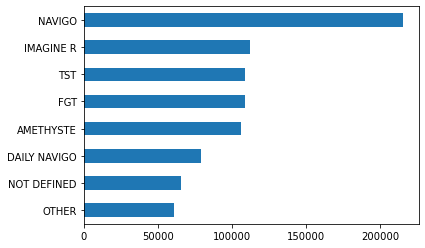

In [32]:
df['TITLE_CATEGORY'].value_counts().sort_values().plot(kind='barh')

In [33]:
#Showing the most recorded stations
df.groupby(df['STATION_NAME'])['NB_VALID'].count().sort_values(ascending=False).head(10)

STATION_NAME
GARE DE LYON                        4735
LA DEFENSE-GRANDE ARCHE             4713
BIBLIOTHEQUE FRANCOIS MITTERRAND    3179
SAINT-LAZARE                        3164
GARE DU NORD                        3130
PORTE MAILLOT                       3010
GARE DE L'EST                       3009
MONTPARNASSE                        2974
NATION                              2888
AUSTERLITZ                          2866
Name: NB_VALID, dtype: int64

<AxesSubplot:>

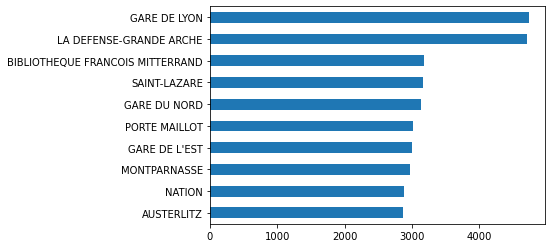

In [34]:
df['STATION_NAME'].value_counts()[:10].sort_values().plot(kind='barh')

In [35]:
#Showing the sum of NB_VALID for every STATION_NAME
df.groupby(df['STATION_NAME'])['NB_VALID'].sum().sort_values(ascending=False).head(10)

STATION_NAME
SAINT-LAZARE                        32477180.0
GARE DE L'EST                       14853063.0
GARE DU NORD                        14651759.0
MONTPARNASSE                        13675157.0
LA DEFENSE-GRANDE ARCHE             12303445.0
GARE DE LYON                         7758245.0
LES HALLES                           5833889.0
BIBLIOTHEQUE FRANCOIS MITTERRAND     5747671.0
REPUBLIQUE                           5549203.0
CHATELET-LES HALLES                  5272189.0
Name: NB_VALID, dtype: float64

## Feature Extraction

### Extract new columns 

In [36]:
#Convert DATE Column to datetime DataType
df["DATE"] = pd.to_datetime(df["DATE"])
print(df.dtypes)

DATE              datetime64[ns]
STATION_NAME              object
TITLE_CATEGORY            object
NB_VALID                 float64
dtype: object


In [37]:
#Extract MONTH and DAY columns from DATE column
df['MONTH'] = df['DATE'].dt.month
df['DAY'] = df['DATE'].dt.day

In [38]:
df.head()

,DATE,STATION_NAME,TITLE_CATEGORY,NB_VALID,MONTH,DAY
0,2019-07-21,LA TOUR MAUBOURG,NAVIGO,1141.0,7,21
1,2019-07-21,PARMENTIER,NOT DEFINED,2.0,7,21
2,2019-07-21,PARMENTIER,TST,97.0,7,21
3,2019-07-21,PEREIRE-LEVALLOIS,FGT,53.0,7,21
4,2019-07-21,PERNETY,OTHER,36.0,7,21


In [39]:
#Add DAY_OF_WEEK column
df['DAY_OF_WEEK'] = df['DATE'].dt.dayofweek

In [40]:
#Add DAY_NAME column
df['DAY_NAME'] = df['DATE'].dt.day_name()

In [41]:
df.head(10)

,DATE,STATION_NAME,TITLE_CATEGORY,NB_VALID,MONTH,DAY,DAY_OF_WEEK,DAY_NAME
0,2019-07-21,LA TOUR MAUBOURG,NAVIGO,1141.0,7,21,6,Sunday
1,2019-07-21,PARMENTIER,NOT DEFINED,2.0,7,21,6,Sunday
2,2019-07-21,PARMENTIER,TST,97.0,7,21,6,Sunday
3,2019-07-21,PEREIRE-LEVALLOIS,FGT,53.0,7,21,6,Sunday
4,2019-07-21,PERNETY,OTHER,36.0,7,21,6,Sunday
5,2019-07-21,PICPUS,FGT,25.0,7,21,6,Sunday
6,2019-07-21,PIERRE CURIE,IMAGINE R,264.0,7,21,6,Sunday
7,2019-07-21,PIGALLE,DAILY NAVIGO,7.0,7,21,6,Sunday
21,2019-07-21,PORTE DE LA CHAPELLE,AMETHYSTE,168.0,7,21,6,Sunday
22,2019-07-21,PORTE DE LA VILLETTE,OTHER,42.0,7,21,6,Sunday


#### Exploratory Data Analysis

In [42]:
df['NB_VALID'] = pd.to_numeric(df.NB_VALID)

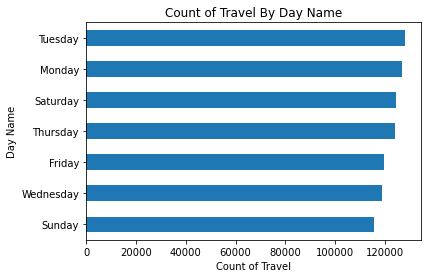

In [43]:
#Showing The most frequent day for traveling
df['DAY_NAME'].value_counts().sort_values().plot(kind='barh')
plt.xlabel("Count of Travel")
plt.ylabel("Day Name")
plt.title("Count of Travel By Day Name");

In [44]:
#Number of trips based on the day of the week
df.groupby([df['MONTH'], df['DAY_NAME']])['NB_VALID'].agg({'count'}).head(3)

count
MONTH DAY_NAME       
1     Friday     4993
      Monday     5071
      Saturday   5034

In [45]:
df.head()

,DATE,STATION_NAME,TITLE_CATEGORY,NB_VALID,MONTH,DAY,DAY_OF_WEEK,DAY_NAME
0,2019-07-21,LA TOUR MAUBOURG,NAVIGO,1141.0,7,21,6,Sunday
1,2019-07-21,PARMENTIER,NOT DEFINED,2.0,7,21,6,Sunday
2,2019-07-21,PARMENTIER,TST,97.0,7,21,6,Sunday
3,2019-07-21,PEREIRE-LEVALLOIS,FGT,53.0,7,21,6,Sunday
4,2019-07-21,PERNETY,OTHER,36.0,7,21,6,Sunday


In [46]:
date_by_month=df.groupby(df['MONTH'])[['NB_VALID']].sum()

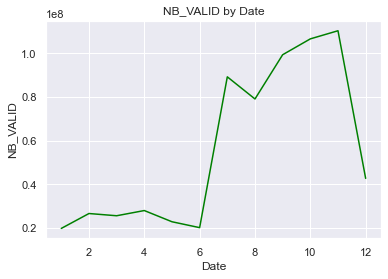

In [47]:
#Showing the number of NB_VALID for every month
sns.set()
plt.xlabel('Date')
plt.ylabel('NB_VALID')
plt.title('NB_VALID by Date')
plt.plot(date_by_month.NB_VALID,color='green')
plt.show()

<AxesSubplot:ylabel='MONTH'>

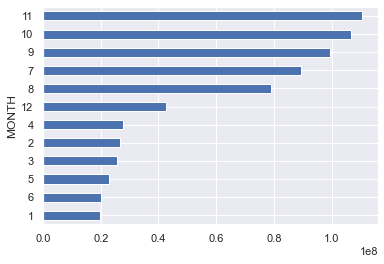

In [48]:
#Showing the most frequent month
df.groupby(df['MONTH'])['NB_VALID'].sum().sort_values(ascending=True).plot(kind='barh')

In [49]:
date_by_day=df.groupby(df['DAY'])[['NB_VALID']].sum()

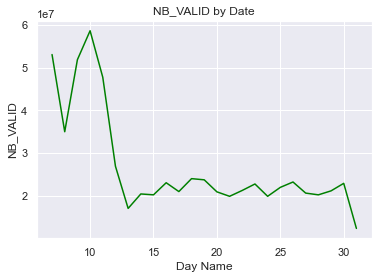

In [50]:
#Showing days with a lot of trips
sns.set()
plt.xlabel('Day Name')
plt.ylabel('NB_VALID')
plt.title('NB_VALID by Date')
plt.plot(date_by_day.NB_VALID,color='green')
plt.show()

Text(0.5, 1.0, 'Count of Travel By Day Name')

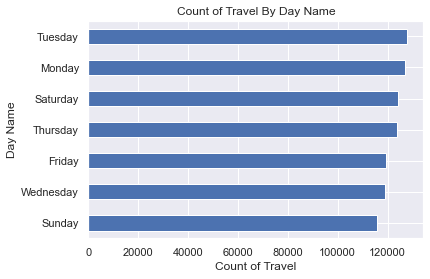

In [51]:
df['DAY_NAME'].value_counts().sort_values().plot(kind='barh')
plt.xlabel("Count of Travel")
plt.ylabel("Day Name")
plt.title("Count of Travel By Day Name")

In [52]:
df.sort_values(['NB_VALID'],ascending=True).groupby(df['TITLE_CATEGORY']).mean()

,NB_VALID,MONTH,DAY,DAY_OF_WEEK
TITLE_CATEGORY,,,,
AMETHYSTE,158.299152,8.119307,16.894089,2.962802
DAILY NAVIGO,7.833194,8.003573,16.760846,2.948191
FGT,217.054545,8.132811,16.898471,2.964225
IMAGINE R,903.703634,8.147022,16.910660,2.968761
NAVIGO,2211.994296,8.166541,16.906493,2.950062
NOT DEFINED,61.113556,8.515664,17.611340,2.918381
OTHER,120.258954,8.046090,16.740025,2.921668
TST,367.719953,8.138257,16.905250,2.963394


In [53]:
#Showing the most freqent date
df['DATE'].value_counts()

2019-11-28    5461
2019-11-29    5457
2019-11-13    5455
2019-11-22    5451
2019-02-12    5450
              ... 
2019-07-12    1989
2019-12-22    1979
2019-12-25    1909
2019-12-15    1890
2019-08-12    1648
Name: DATE, Length: 184, dtype: int64

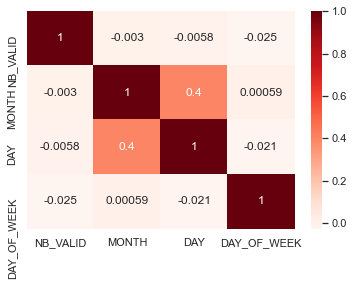

In [54]:
#Colleration between columns
df.corr()
sns.heatmap(df.corr(),cmap='Reds',annot=True)
plt.rcParams['figure.figsize']=(10,5)

In [55]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[["ScaledNB_VALID"]] = scaler.fit_transform(df[['NB_VALID']])

In [60]:
df['ScaledNB_VALID']
   

0         0.009112
1         0.000000
2         0.000760
3         0.000408
4         0.000272
            ...   
883953    0.002240
883954    0.022423
883955    0.114995
883956    0.036887
883957    0.008136
Name: ScaledNB_VALID, Length: 856957, dtype: float64

## Work With Categorical Data

In [57]:
def onehot_encode(df, column):
    df = df.copy()
    dummies = pd.get_dummies(df[column], prefix=column)
    df = pd.concat([df, dummies], axis=1)
    df = df.drop(column, axis=1)
    return df

In [58]:
# One-hot encode categorical features
for column in ['STATION_NAME', 'TITLE_CATEGORY']:
    df = onehot_encode(df, column=column)

In [59]:
df.head()

,DATE,NB_VALID,MONTH,DAY,DAY_OF_WEEK,DAY_NAME,ScaledNB_VALID,STATION_NAME_ABBESSES,STATION_NAME_ABLON,STATION_NAME_ACHERES-GRAND-CORMIER,...,STATION_NAME_WAGRAM,STATION_NAME_YERRES,TITLE_CATEGORY_AMETHYSTE,TITLE_CATEGORY_DAILY NAVIGO,TITLE_CATEGORY_FGT,TITLE_CATEGORY_IMAGINE R,TITLE_CATEGORY_NAVIGO,TITLE_CATEGORY_NOT DEFINED,TITLE_CATEGORY_OTHER,TITLE_CATEGORY_TST
0,2019-07-21,1141.0,7,21,6,Sunday,0.009112,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,2019-07-21,2.0,7,21,6,Sunday,0.000000,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,2019-07-21,97.0,7,21,6,Sunday,0.000760,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,2019-07-21,53.0,7,21,6,Sunday,0.000408,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,2019-07-21,36.0,7,21,6,Sunday,0.000272,0,0,0,...,0,0,0,0,0,0,0,0,1,0
